In [481]:
# usual imports
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# warnings
import warnings
warnings.filterwarnings('ignore')

In [482]:
df = pd.read_csv('../Resources/AI_Impact_On_Jobs_2030.csv')

In [483]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [484]:
df.shape

(3000, 18)

In [485]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [486]:
df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

In [487]:
df['Automation_Probability_2030'].value_counts()

Automation_Probability_2030
0.57    55
0.56    48
0.48    48
0.40    47
0.43    46
        ..
0.06    22
0.18    21
0.23    19
0.05    18
0.95    14
Name: count, Length: 91, dtype: int64

In [488]:
df['Risk_Category'].value_counts()

Risk_Category
Medium    1521
High       740
Low        739
Name: count, dtype: int64

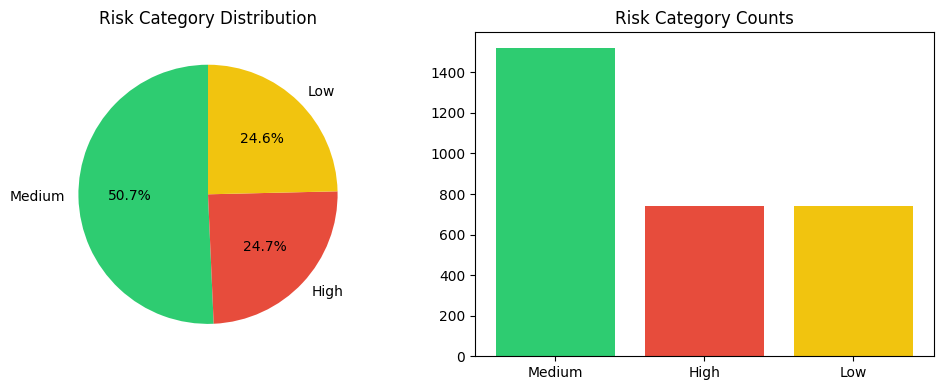

In [489]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

risk_counts = df['Risk_Category'].value_counts()

colors = ['#2ecc71', '#e74c3c', '#f1c40f']

axes[0].pie(risk_counts, 
            labels=['Medium', 'High', 'Low'], 
            autopct='%1.1f%%', 
            colors=colors, 
            startangle=90)
axes[0].set_title('Risk Category Distribution')

axes[1].bar(risk_counts.index, risk_counts.values, color=colors)
axes[1].set_title('Risk Category Counts')

plt.tight_layout()
plt.show()

In [490]:
numerical_cols = df.select_dtypes("number")
numerical_cols

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,111319,6,0.24,1.18,0.20,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,44363,29,0.65,0.74,0.35,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,61325,23,0.64,0.94,0.39,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,110296,7,0.95,1.23,0.46,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70


In [491]:
numerical_cols.columns

Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10'],
      dtype='object')

In [492]:
df[numerical_cols.columns].describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


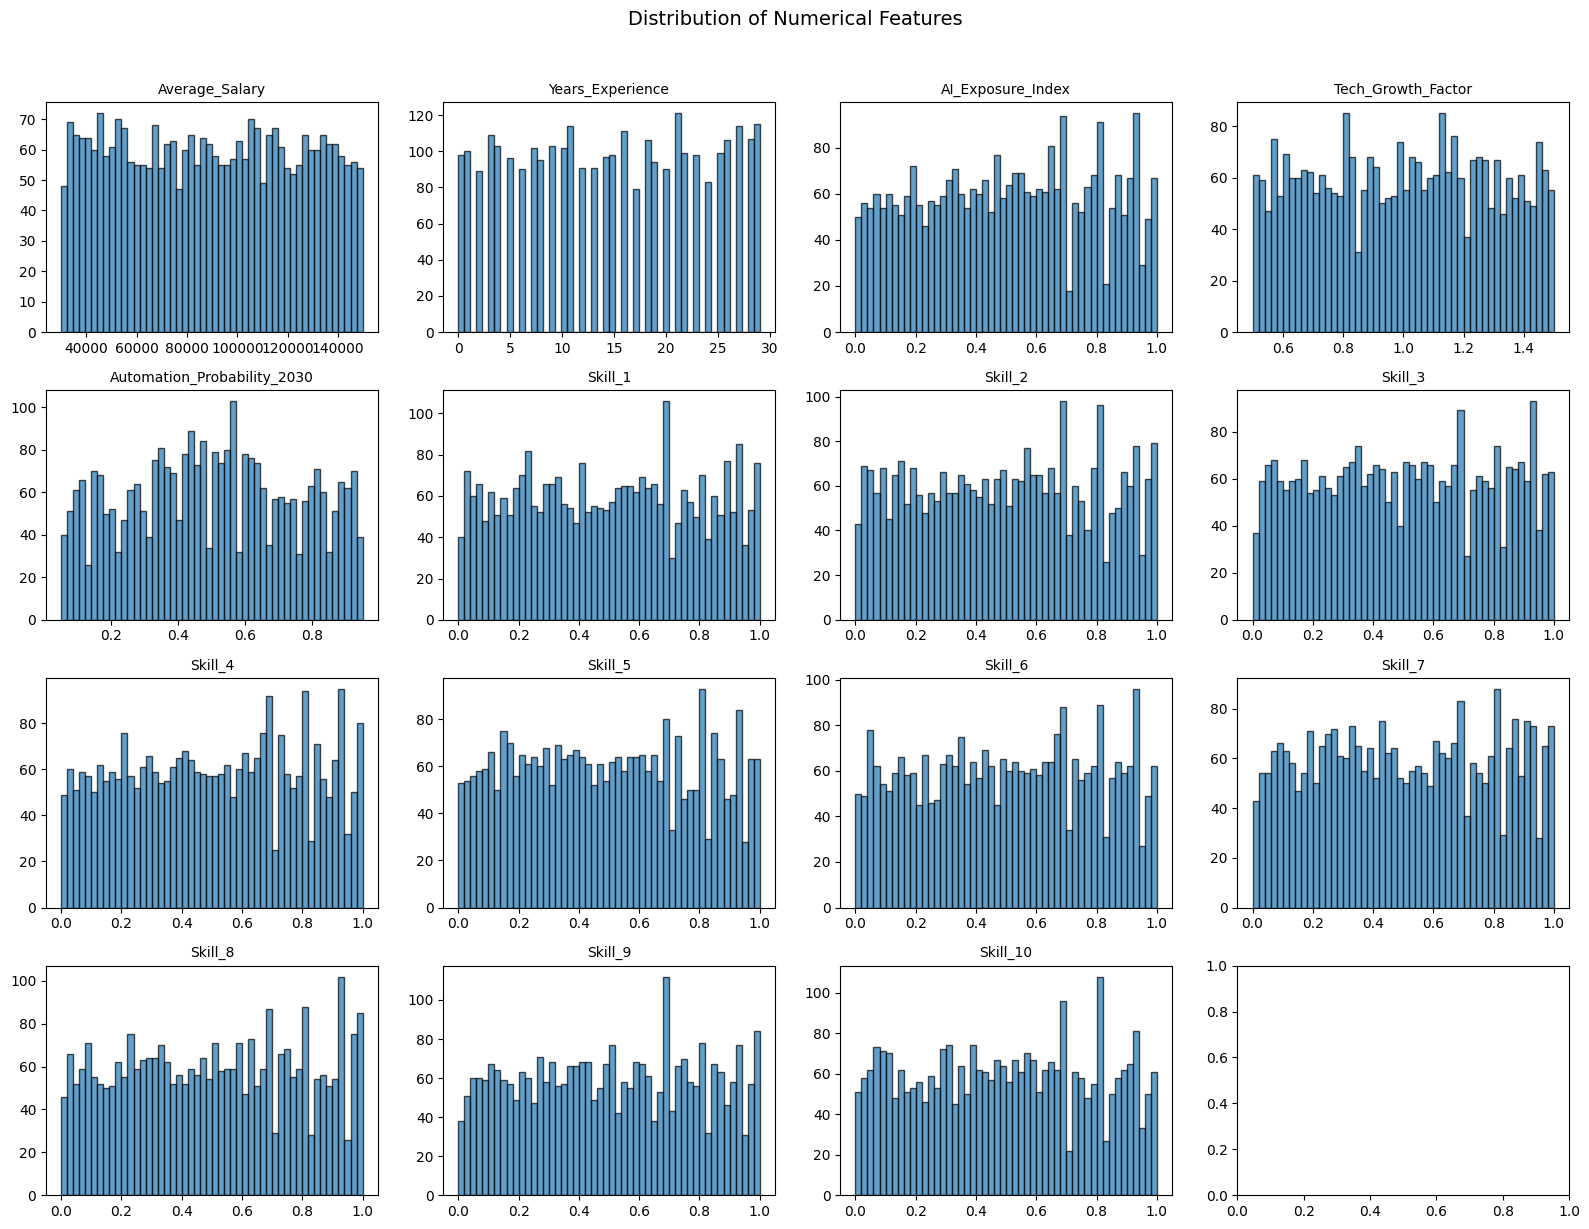

In [493]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))

axes = axes.ravel()

for idx, col in enumerate(numerical_cols.columns[:16]):
    axes[idx].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

In [494]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['Job_Title', 'Education_Level', 'Risk_Category']

In [495]:
df.groupby('Risk_Category')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Risk_Category,,,,,,,,,,,,,,,
High,87359.441892,14.497297,0.509851,0.999811,0.829500,0.514541,0.507581,0.496054,0.501095,0.486838,0.492446,0.499405,0.500135,0.503824,0.500959
Low,89166.776725,14.723951,0.496049,0.981231,0.176604,0.488742,0.492625,0.509337,0.506360,0.502760,0.482882,0.509959,0.512463,0.503085,0.491448
Medium,90451.414859,14.742932,0.499658,1.000026,0.499783,0.492426,0.494438,0.496029,0.503609,0.485871,0.511611,0.493794,0.499487,0.499467,0.491118


In [496]:
df.groupby('Education_Level')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Education_Level,,,,,,,,,,,,,,,
Bachelor's,88815.495425,14.530719,0.496510,1.009739,0.500353,0.494327,0.495203,0.501882,0.499725,0.484941,0.494170,0.489752,0.489935,0.497333,0.495817
High School,88389.293367,14.204082,0.497551,0.991811,0.509056,0.489605,0.510166,0.498584,0.496199,0.483444,0.512219,0.496747,0.510421,0.495191,0.482423
Master's,91318.564626,14.923810,0.503401,0.992367,0.495633,0.508925,0.478109,0.497061,0.507075,0.487537,0.503565,0.507034,0.502898,0.510599,0.504163
PhD,89045.575419,15.100559,0.508296,0.986885,0.500489,0.495601,0.504874,0.499679,0.512556,0.506243,0.488380,0.503771,0.508282,0.503240,0.492737


In [497]:
df.groupby('Job_Title')[numerical_cols.columns].mean()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Job_Title,,,,,,,,,,,,,,,
AI Engineer,90759.828571,14.442857,0.474286,0.978500,0.172214,0.486214,0.497643,0.528357,0.516071,0.497571,0.485429,0.520786,0.499357,0.495714,0.491786
Chef,91407.801418,14.929078,0.528794,1.081348,0.495674,0.460071,0.477021,0.478511,0.495106,0.489716,0.550780,0.500426,0.495816,0.490709,0.503333
Construction Worker,90800.333333,14.557692,0.504808,0.998397,0.825962,0.538590,0.516667,0.490385,0.505705,0.461859,0.490449,0.524744,0.447115,0.502244,0.503205
Customer Support,87487.000000,14.000000,0.501504,0.991353,0.825263,0.514962,0.521654,0.513459,0.472782,0.475639,0.508947,0.534887,0.509474,0.528421,0.523759
Data Scientist,90629.550898,13.898204,0.512874,0.959940,0.496287,0.495150,0.490120,0.495629,0.521796,0.512814,0.510060,0.504850,0.477844,0.506168,0.525090
Doctor,89091.742424,14.674242,0.505152,0.963788,0.176742,0.490833,0.469545,0.524848,0.475303,0.475682,0.522045,0.470303,0.521818,0.503106,0.465455
Financial Analyst,88030.311258,14.350993,0.464437,1.027815,0.485099,0.552649,0.532980,0.456291,0.474305,0.531921,0.504437,0.463841,0.470265,0.514967,0.495232
Graphic Designer,96423.468750,14.631250,0.527062,0.992500,0.529000,0.471500,0.495000,0.501375,0.496188,0.494000,0.485438,0.516188,0.476625,0.514125,0.479750
HR Specialist,89242.254777,15.439490,0.489236,0.986815,0.490764,0.516369,0.505414,0.511847,0.505541,0.440000,0.515987,0.529236,0.520892,0.495159,0.503631


In [498]:
df.groupby('Risk_Category')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Risk_Category
High      0.829500
Medium    0.499783
Low       0.176604
Name: Automation_Probability_2030, dtype: float64

In [499]:
df.groupby('Education_Level')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Education_Level
High School    0.509056
PhD            0.500489
Bachelor's     0.500353
Master's       0.495633
Name: Automation_Probability_2030, dtype: float64

In [500]:
df.groupby('Job_Title')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Job_Title
Retail Worker          0.834710
Security Guard         0.833052
Construction Worker    0.825962
Customer Support       0.825263
Truck Driver           0.818627
Graphic Designer       0.529000
Software Engineer      0.508686
Data Scientist         0.496287
Chef                   0.495674
Marketing Manager      0.494776
UX Researcher          0.492395
HR Specialist          0.490764
Lawyer                 0.486439
Mechanic               0.485294
Financial Analyst      0.485099
Doctor                 0.176742
Teacher                0.175783
Nurse                  0.175634
Research Scientist     0.174161
AI Engineer            0.172214
Name: Automation_Probability_2030, dtype: float64

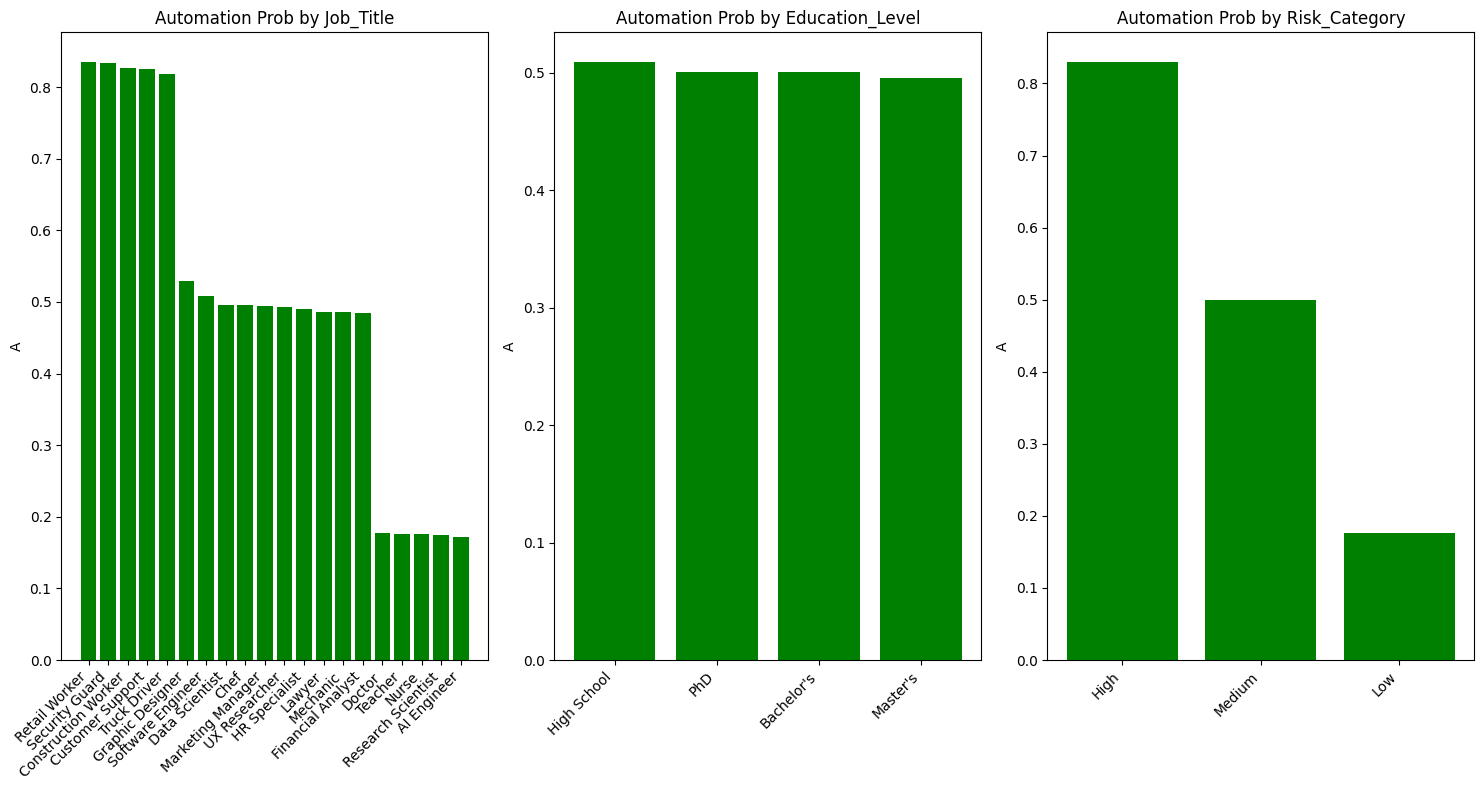

In [501]:
# Divorce rate by categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols[:3]):
    auto_prob = df.groupby(col)['Automation_Probability_2030'].mean().sort_values(ascending=False)
    axes[idx].bar(range(len(auto_prob)), auto_prob.values, color ='green')
    axes[idx].set_title(f'Automation Prob by {col}')
    axes[idx].set_xticks(range(len(auto_prob)))
    axes[idx].set_xticklabels(auto_prob.index, rotation=45, ha='right')
    axes[idx].set_ylabel('A')

plt.tight_layout()
plt.show()

In [502]:
num_cols = numerical_cols.columns.tolist()
num_cols

['Average_Salary',
 'Years_Experience',
 'AI_Exposure_Index',
 'Tech_Growth_Factor',
 'Automation_Probability_2030',
 'Skill_1',
 'Skill_2',
 'Skill_3',
 'Skill_4',
 'Skill_5',
 'Skill_6',
 'Skill_7',
 'Skill_8',
 'Skill_9',
 'Skill_10']

In [503]:
correlation_num = df[num_cols].corr()
correlation_num

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
Average_Salary,1.000000,0.017389,-0.020196,-0.002214,-0.013367,-0.016888,-0.021382,0.019271,-0.024862,-0.010809,-0.015895,0.017232,-0.005487,-0.007120,0.041655
Years_Experience,0.017389,1.000000,0.034599,-0.023371,-0.017676,0.011118,0.009353,-0.016043,-0.025986,-0.001974,-0.002484,0.006845,0.030740,-0.028956,0.011798
AI_Exposure_Index,-0.020196,0.034599,1.000000,0.016485,0.014320,-0.005675,0.018888,-0.011234,0.022386,-0.010878,0.008196,0.016615,-0.007744,0.003171,0.004656
Tech_Growth_Factor,-0.002214,-0.023371,0.016485,1.000000,0.025538,0.001253,0.004276,0.007915,-0.013198,-0.017557,0.034580,-0.020690,-0.011194,0.017333,-0.033288
Automation_Probability_2030,-0.013367,-0.017676,0.014320,0.025538,1.000000,0.030947,0.024247,-0.020198,0.005963,-0.026349,0.011701,-0.010226,-0.016452,0.001269,0.002665
Skill_1,-0.016888,0.011118,-0.005675,0.001253,0.030947,1.000000,-0.015902,0.038025,0.002860,-0.007998,0.006723,0.010338,-0.027314,-0.005368,-0.014475
Skill_2,-0.021382,0.009353,0.018888,0.004276,0.024247,-0.015902,1.000000,-0.038053,0.006365,-0.023542,0.003117,-0.006391,0.008480,0.027924,-0.018727
Skill_3,0.019271,-0.016043,-0.011234,0.007915,-0.020198,0.038025,-0.038053,1.000000,0.006107,-0.026576,-0.009040,0.022618,0.007096,-0.020222,0.004567
Skill_4,-0.024862,-0.025986,0.022386,-0.013198,0.005963,0.002860,0.006365,0.006107,1.000000,-0.005616,0.006005,-0.020369,-0.011918,-0.036873,0.013784
Skill_5,-0.010809,-0.001974,-0.010878,-0.017557,-0.026349,-0.007998,-0.023542,-0.026576,-0.005616,1.000000,0.029703,-0.006449,0.006939,0.044185,-0.026335


In [504]:
corr_values = correlation_num['Automation_Probability_2030'].sort_values(ascending=False)[1:]
corr_values

Skill_1               0.030947
Tech_Growth_Factor    0.025538
Skill_2               0.024247
AI_Exposure_Index     0.014320
Skill_6               0.011701
Skill_4               0.005963
Skill_10              0.002665
Skill_9               0.001269
Skill_7              -0.010226
Average_Salary       -0.013367
Skill_8              -0.016452
Years_Experience     -0.017676
Skill_3              -0.020198
Skill_5              -0.026349
Name: Automation_Probability_2030, dtype: float64

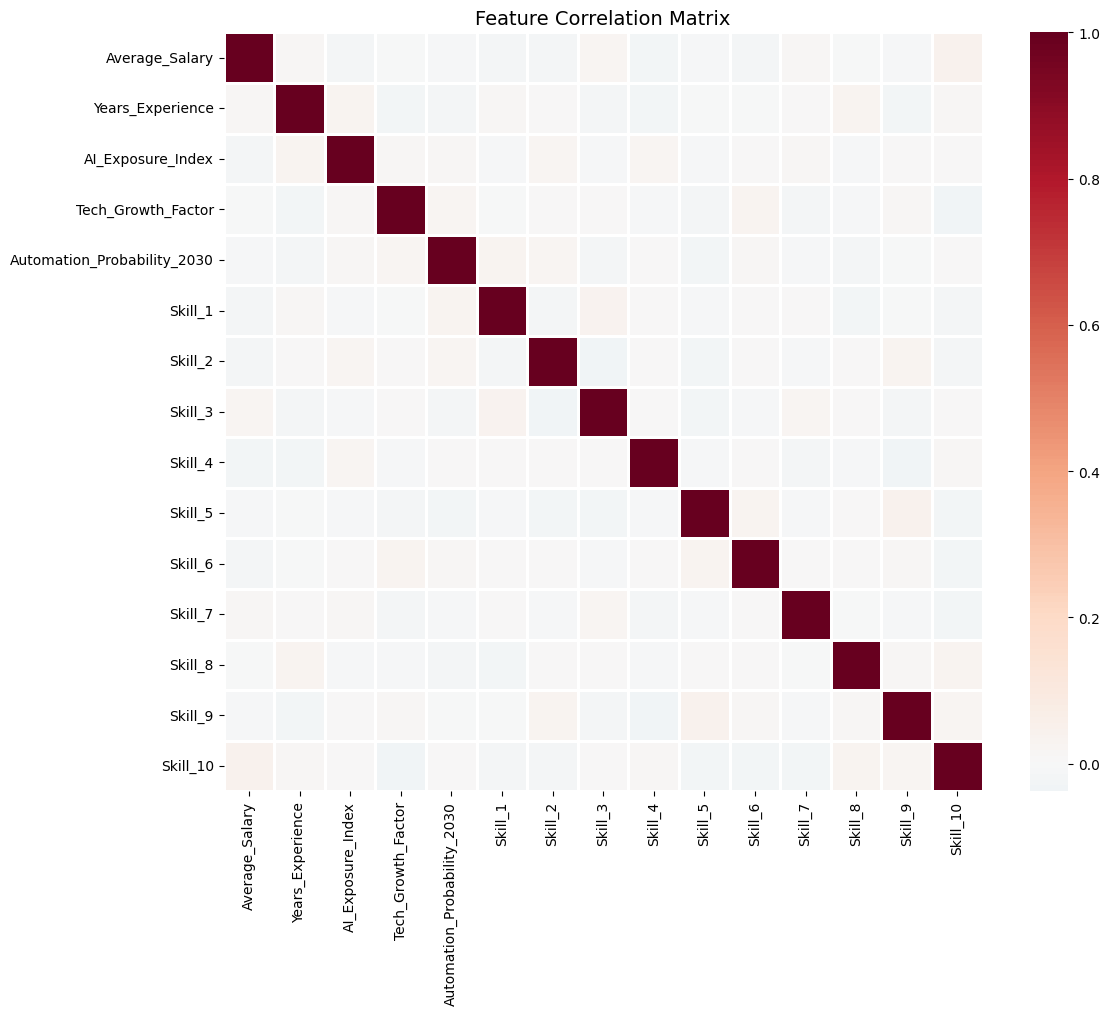

In [505]:
plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu_r', center=0, 
            square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

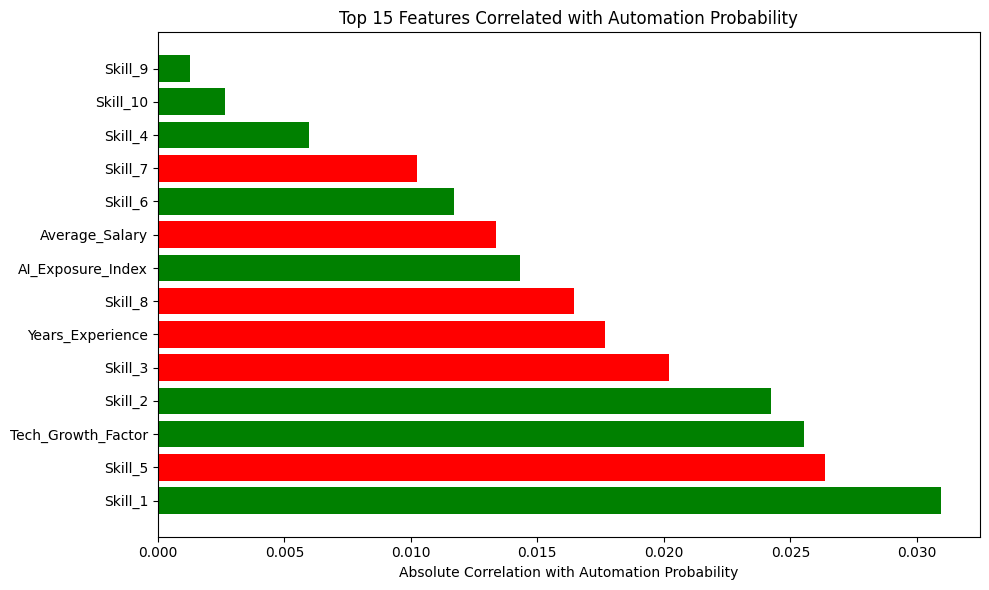

In [506]:
plt.figure(figsize=(10, 6))
top_corr = corr_values.abs().sort_values(ascending=False).head(15)
colors = ['red' if x < 0 else 'green' for x in corr_values[top_corr.index]]
plt.barh(range(len(top_corr)), top_corr.values, color=colors)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Absolute Correlation with Automation Probability')
plt.title('Top 15 Features Correlated with Automation Probability')
plt.tight_layout()
plt.show()

In [507]:
df['Years_Experience'].value_counts().sort_values(ascending=False)

Years_Experience
21    121
29    115
27    114
11    114
16    111
3     109
28    107
18    106
26    106
4     103
9     103
10    102
7     102
1     100
22     99
25     99
0      98
15     98
23     98
14     97
5      96
8      95
19     94
13     91
12     91
20     90
6      90
2      89
24     83
17     79
Name: count, dtype: int64

In [508]:
bins = [-1, 2, 5, 10, 20, float('inf')]

labels = ['Entry/Junior', 'Early Career', 'Mid-Level', 'Senior', 'Expert/Late']

df['Experience_Band'] = pd.cut(df['Years_Experience'], 
                               bins=bins, 
                               labels=labels, 
                               right=False) 

In [509]:
print(df['Experience_Band'].value_counts(sort=True))

Experience_Band
Expert/Late     1032
Senior           983
Mid-Level        486
Early Career     301
Entry/Junior     198
Name: count, dtype: int64


In [510]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,Expert/Late
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,Expert/Late
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,Early Career
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,Senior
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,Expert/Late


In [511]:
df.groupby('Experience_Band')['Automation_Probability_2030'].mean().sort_values(ascending=False)

Experience_Band
Mid-Level       0.517037
Early Career    0.515150
Entry/Junior    0.507273
Expert/Late     0.498140
Senior          0.492014
Name: Automation_Probability_2030, dtype: float64

In [512]:
bins = [-float('inf'), 30500, 100000, float('inf')]
labels = ['Low', 'Middle', 'High']

df['Income_Band'] = pd.cut(df['Average_Salary'], 
                           bins=bins, 
                           labels=labels, 
                           right=False)

In [513]:
print(df['Income_Band'].value_counts(sort=False))

Income_Band
Low         11
Middle    1742
High      1247
Name: count, dtype: int64


In [514]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band,Income_Band
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00,Expert/Late,Middle
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98,Expert/Late,High
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83,Early Career,High
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33,Senior,High
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42,Expert/Late,Middle


In [515]:
sector_map = {
    "Security Guard":      "Security & Protective Services",
    "Research Scientist":  "Research & Development",
    "Construction Worker": "Construction",
    "Software Engineer":   "Digital & Technology",
    "Financial Analyst":   "Finance & Professional Services",
    "AI Engineer":         "Digital & Technology",
    "Mechanic":            "Transport & Automotive Services",
    "Teacher":             "Education",
    "HR Specialist":       "Business & Professional Services",
    "Customer Support":    "Customer Service",
    "UX Researcher":       "Digital & Creative Industries",
    "Lawyer":              "Legal Services",
    "Data Scientist":      "Digital & Technology",
    "Graphic Designer":    "Creative Industries",
    "Retail Worker":       "Retail & Consumer Services",
    "Doctor":              "Health & Social Care",
    "Truck Driver":        "Transport & Logistics",
    "Chef":                "Hospitality & Catering",
    "Nurse":               "Health & Social Care",
    "Marketing Manager":   "Marketing & Professional Services",
}

df['Sector'] = df['Job_Title'].map(sector_map)

In [516]:
group_map = {
    # Public_Sector
    "Teacher":          "Public_Sector",
    "Doctor":           "Public_Sector",
    "Nurse":            "Public_Sector",

    # Private_Professional
    "Financial Analyst":"Private_Professional",
    "HR Specialist":    "Private_Professional",
    "Lawyer":           "Private_Professional",
    "Marketing Manager":"Private_Professional",

    # Digital_Creative
    "Research Scientist":"Digital_Creative",
    "Software Engineer": "Digital_Creative",
    "AI Engineer":       "Digital_Creative",
    "UX Researcher":     "Digital_Creative",
    "Data Scientist":    "Digital_Creative",
    "Graphic Designer":  "Digital_Creative",

    # Manual_Trade_Service
    "Security Guard":    "Manual_Trade_Service",
    "Construction Worker":"Manual_Trade_Service",
    "Mechanic":          "Manual_Trade_Service",
    "Customer Support":  "Manual_Trade_Service",
    "Retail Worker":     "Manual_Trade_Service",
    "Truck Driver":      "Manual_Trade_Service",
    "Chef":              "Manual_Trade_Service",
}
df['Grouping_Tag'] = df['Job_Title'].map(group_map)

In [517]:
print(df['Sector'].value_counts(sort=False))

Sector
Security & Protective Services       154
Research & Development               149
Construction                         156
Digital & Technology                 482
Finance & Professional Services      151
Transport & Automotive Services      136
Education                            166
Business & Professional Services     157
Customer Service                     133
Digital & Creative Industries        167
Legal Services                       132
Creative Industries                  160
Retail & Consumer Services           155
Health & Social Care                 274
Transport & Logistics                153
Hospitality & Catering               141
Marketing & Professional Services    134
Name: count, dtype: int64


In [518]:
print(df['Grouping_Tag'].value_counts(sort=False))

Grouping_Tag
Manual_Trade_Service    1028
Digital_Creative         958
Private_Professional     574
Public_Sector            440
Name: count, dtype: int64


In [519]:
df['Sector'] = df['Sector'].fillna('Other')
df['Grouping_Tag'] = df['Grouping_Tag'].fillna('Other')

In [520]:
print(df['Grouping_Tag'].value_counts(sort=False))

Grouping_Tag
Manual_Trade_Service    1028
Digital_Creative         958
Private_Professional     574
Public_Sector            440
Name: count, dtype: int64


In [521]:
print(df['Sector'].value_counts(sort=False))

Sector
Security & Protective Services       154
Research & Development               149
Construction                         156
Digital & Technology                 482
Finance & Professional Services      151
Transport & Automotive Services      136
Education                            166
Business & Professional Services     157
Customer Service                     133
Digital & Creative Industries        167
Legal Services                       132
Creative Industries                  160
Retail & Consumer Services           155
Health & Social Care                 274
Transport & Logistics                153
Hospitality & Catering               141
Marketing & Professional Services    134
Name: count, dtype: int64


<Axes: xlabel='Grouping_Tag'>

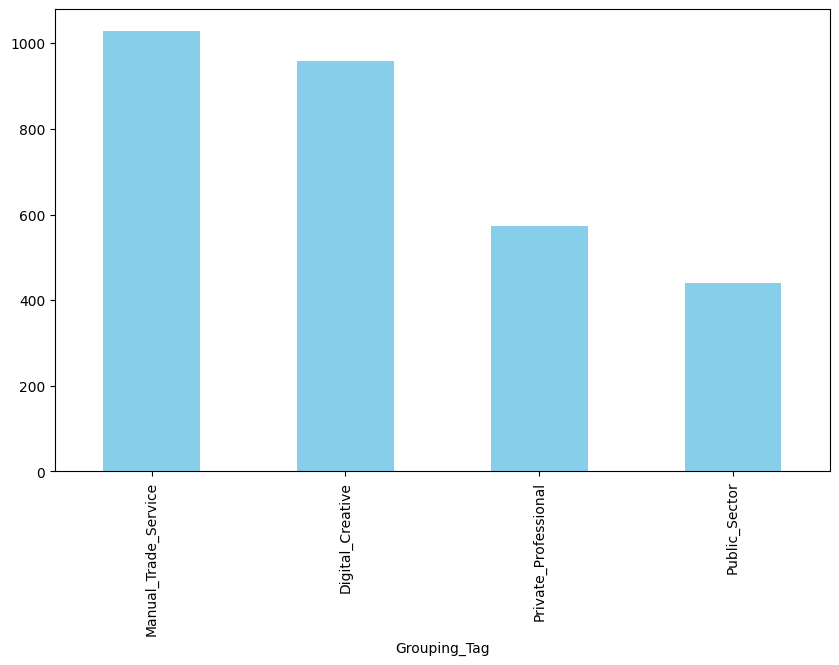

In [522]:
df['Grouping_Tag'].value_counts(sort=True).plot(kind='bar', figsize=(10,6), color='skyblue')

<Axes: xlabel='Sector'>

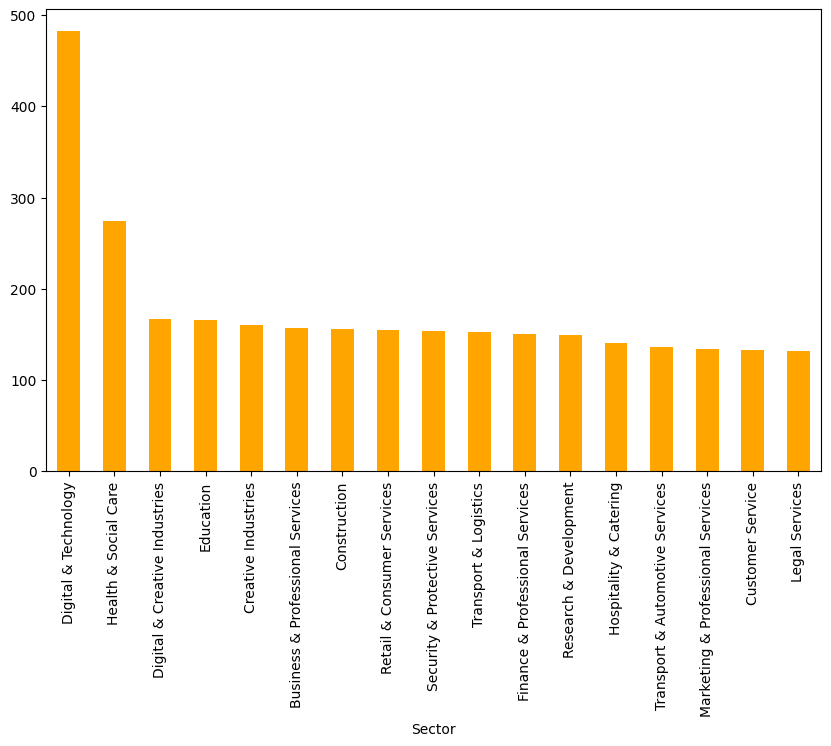

In [523]:
df['Sector'].value_counts(sort=True).plot(kind='bar', figsize=(10,6), color='orange')

In [524]:
ml_df = df.copy()

In [525]:
ml_df

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band,Income_Band,Sector,Grouping_Tag
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,0.14,0.65,0.06,0.72,0.94,0.00,Expert/Late,Middle,Security & Protective Services,Manual_Trade_Service
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,0.97,0.23,0.09,0.62,0.38,0.98,Expert/Late,High,Research & Development,Digital_Creative
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,0.02,0.23,0.24,0.68,0.61,0.83,Early Career,High,Construction,Manual_Trade_Service
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,0.84,0.45,0.40,0.93,0.73,0.33,Senior,High,Digital & Technology,Digital_Creative
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,0.61,0.28,0.30,0.17,0.02,0.42,Expert/Late,Middle,Finance & Professional Services,Private_Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,...,0.08,0.92,0.65,0.33,0.76,0.45,Mid-Level,High,Health & Social Care,Public_Sector
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,...,0.56,0.29,0.69,0.80,0.61,0.20,Expert/Late,Middle,Digital & Creative Industries,Digital_Creative
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,...,0.96,0.01,0.70,0.29,0.48,0.57,Expert/Late,Middle,Digital & Technology,Digital_Creative
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,...,0.55,0.68,0.31,0.55,0.34,0.70,Mid-Level,High,Creative Industries,Digital_Creative


In [526]:
income_type = CategoricalDtype(
    categories=['Low', 'Middle', 'High'],
    ordered=True
)

ml_df['Income_Band'] = ml_df['Income_Band'].astype(income_type)

ml_df['Income_Band_Code'] = ml_df['Income_Band'].cat.codes

In [527]:
ml_df[['Income_Band_Code', 'Income_Band']].value_counts(sort=True)

Income_Band_Code  Income_Band
1                 Middle         1742
2                 High           1247
0                 Low              11
Name: count, dtype: int64

In [528]:
exp_type = CategoricalDtype(
    categories=['Entry/Junior', 'Early Career', 'Mid-Level', 'Senior', 'Expert/Late'],
    ordered=True
)

ml_df['Experience_Band'] = ml_df['Experience_Band'].astype(exp_type)

ml_df['Experience_Band_Code'] = ml_df['Experience_Band'].cat.codes

In [529]:
ml_df[['Experience_Band', 'Experience_Band_Code']].value_counts(sort=True)

Experience_Band  Experience_Band_Code
Expert/Late      4                       1032
Senior           3                        983
Mid-Level        2                        486
Early Career     1                        301
Entry/Junior     0                        198
Name: count, dtype: int64

In [530]:
ml_df.head()


,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Skill_7,Skill_8,Skill_9,Skill_10,Experience_Band,Income_Band,Sector,Grouping_Tag,Income_Band_Code,Experience_Band_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,0.06,0.72,0.94,0.00,Expert/Late,Middle,Security & Protective Services,Manual_Trade_Service,1,4
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,0.09,0.62,0.38,0.98,Expert/Late,High,Research & Development,Digital_Creative,2,4
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,0.24,0.68,0.61,0.83,Early Career,High,Construction,Manual_Trade_Service,2,1
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,0.40,0.93,0.73,0.33,Senior,High,Digital & Technology,Digital_Creative,2,3
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,0.30,0.17,0.02,0.42,Expert/Late,Middle,Finance & Professional Services,Private_Professional,1,4


In [531]:
ml_df['Sector_Code'], sector_uniques = pd.factorize(df['Sector'])
ml_df['Grouping_Tag_Code'], group_uniques = pd.factorize(df['Grouping_Tag'])

In [532]:
ml_df[['Sector','Sector_Code']].value_counts(sort=True)

Sector                             Sector_Code
Digital & Technology               3              482
Health & Social Care               13             274
Digital & Creative Industries      9              167
Education                          6              166
Creative Industries                11             160
Business & Professional Services   7              157
Construction                       2              156
Retail & Consumer Services         12             155
Security & Protective Services     0              154
Transport & Logistics              14             153
Finance & Professional Services    4              151
Research & Development             1              149
Hospitality & Catering             15             141
Transport & Automotive Services    5              136
Marketing & Professional Services  16             134
Customer Service                   8              133
Legal Services                     10             132
Name: count, dtype: int64

In [533]:
ml_df[['Grouping_Tag','Grouping_Tag_Code']].value_counts(sort=True)

Grouping_Tag          Grouping_Tag_Code
Manual_Trade_Service  0                    1028
Digital_Creative      1                     958
Private_Professional  2                     574
Public_Sector         3                     440
Name: count, dtype: int64

In [534]:
ml_df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Skill_9,Skill_10,Experience_Band,Income_Band,Sector,Grouping_Tag,Income_Band_Code,Experience_Band_Code,Sector_Code,Grouping_Tag_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,0.94,0.00,Expert/Late,Middle,Security & Protective Services,Manual_Trade_Service,1,4,0,0
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,0.38,0.98,Expert/Late,High,Research & Development,Digital_Creative,2,4,1,1
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,0.61,0.83,Early Career,High,Construction,Manual_Trade_Service,2,1,2,0
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,0.73,0.33,Senior,High,Digital & Technology,Digital_Creative,2,3,3,1
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,0.02,0.42,Expert/Late,Middle,Finance & Professional Services,Private_Professional,1,4,4,2


In [535]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Job_Title                    3000 non-null   object  
 1   Average_Salary               3000 non-null   int64   
 2   Years_Experience             3000 non-null   int64   
 3   Education_Level              3000 non-null   object  
 4   AI_Exposure_Index            3000 non-null   float64 
 5   Tech_Growth_Factor           3000 non-null   float64 
 6   Automation_Probability_2030  3000 non-null   float64 
 7   Risk_Category                3000 non-null   object  
 8   Skill_1                      3000 non-null   float64 
 9   Skill_2                      3000 non-null   float64 
 10  Skill_3                      3000 non-null   float64 
 11  Skill_4                      3000 non-null   float64 
 12  Skill_5                      3000 non-null   float64 
 13  Ski

In [536]:
risk_type = CategoricalDtype(
    categories=['Low', 'Medium', 'High'],
    ordered=True
)

ml_df['Risk_Category'] = ml_df['Risk_Category'].astype(risk_type)
ml_df['Risk_Code'] = ml_df['Risk_Category'].cat.codes

In [537]:
ml_df[['Risk_Category','Risk_Code']].value_counts(sort=True)

Risk_Category  Risk_Code
Medium         1            1521
High           2             740
Low            0             739
Name: count, dtype: int64

In [538]:
ml_df['Job_Title_Code'], job_uniques = pd.factorize(df['Job_Title'])

In [539]:
ml_df[['Job_Title','Job_Title_Code']].value_counts(sort=True)

Job_Title            Job_Title_Code
Software Engineer    3                 175
Data Scientist       12                167
UX Researcher        10                167
Teacher              7                 166
Graphic Designer     13                160
HR Specialist        8                 157
Construction Worker  2                 156
Retail Worker        14                155
Security Guard       0                 154
Truck Driver         16                153
Financial Analyst    4                 151
Research Scientist   1                 149
Nurse                18                142
Chef                 17                141
AI Engineer          5                 140
Mechanic             6                 136
Marketing Manager    19                134
Customer Support     9                 133
Lawyer               11                132
Doctor               15                132
Name: count, dtype: int64

In [540]:
ml_df['Education_Level'].value_counts(sort=True)

Education_Level
High School    784
Bachelor's     765
Master's       735
PhD            716
Name: count, dtype: int64

In [541]:
edu_order = [
    "High School",
    "Bachelor's",
    "Master's",
    'PhD'
]
edu_type = CategoricalDtype(categories=edu_order,
                             ordered=True)
ml_df['Education_Level'] = ml_df['Education_Level'].astype(edu_type)
ml_df['Education_Code'] = ml_df['Education_Level'].cat.codes

In [542]:
ml_df[['Education_Level','Education_Code']].value_counts(sort=True)

Education_Level  Education_Code
High School      0                 784
Bachelor's       1                 765
Master's         2                 735
PhD              3                 716
Name: count, dtype: int64

In [543]:
ml_df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,...,Income_Band,Sector,Grouping_Tag,Income_Band_Code,Experience_Band_Code,Sector_Code,Grouping_Tag_Code,Risk_Code,Job_Title_Code,Education_Code
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,...,Middle,Security & Protective Services,Manual_Trade_Service,1,4,0,0,2,0,2
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,...,High,Research & Development,Digital_Creative,2,4,1,1,0,1,3
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,...,High,Construction,Manual_Trade_Service,2,1,2,0,2,2,0
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,...,High,Digital & Technology,Digital_Creative,2,3,3,1,1,3,3
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,...,Middle,Finance & Professional Services,Private_Professional,1,4,4,2,1,4,0


In [544]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Job_Title                    3000 non-null   object  
 1   Average_Salary               3000 non-null   int64   
 2   Years_Experience             3000 non-null   int64   
 3   Education_Level              3000 non-null   category
 4   AI_Exposure_Index            3000 non-null   float64 
 5   Tech_Growth_Factor           3000 non-null   float64 
 6   Automation_Probability_2030  3000 non-null   float64 
 7   Risk_Category                3000 non-null   category
 8   Skill_1                      3000 non-null   float64 
 9   Skill_2                      3000 non-null   float64 
 10  Skill_3                      3000 non-null   float64 
 11  Skill_4                      3000 non-null   float64 
 12  Skill_5                      3000 non-null   float64 
 13  Ski

In [545]:
ml_df_num = ml_df.select_dtypes(include=['number'])

In [546]:
ml_df_num.head()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Income_Band_Code,Experience_Band_Code,Sector_Code,Grouping_Tag_Code,Risk_Code,Job_Title_Code,Education_Code
0,45795,28,0.18,1.28,0.85,0.45,0.10,0.46,0.33,0.14,...,0.72,0.94,0.00,1,4,0,0,2,0,2
1,133355,20,0.62,1.11,0.05,0.02,0.52,0.40,0.05,0.97,...,0.62,0.38,0.98,2,4,1,1,0,1,3
2,146216,2,0.86,1.18,0.81,0.01,0.94,0.56,0.39,0.02,...,0.68,0.61,0.83,2,1,2,0,2,2,0
3,136530,13,0.39,0.68,0.60,0.43,0.21,0.57,0.03,0.84,...,0.93,0.73,0.33,2,3,3,1,1,3,3
4,70397,22,0.52,1.46,0.64,0.75,0.54,0.59,0.97,0.61,...,0.17,0.02,0.42,1,4,4,2,1,4,0


In [547]:
X = ml_df_num.drop(['Risk_Code', 'Automation_Probability_2030'], axis=1)
y = ml_df_num['Risk_Code']

In [548]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y, 
                                                     test_size=0.2, 
                                                     stratify=y, 
                                                     random_state=42)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [549]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,2000
,multi_class,'multinomial'


In [550]:
preds = model.predict(X_test_scaled)
probs = model.predict_proba(X_test_scaled)  # [[low_prob, med_prob, high_prob], ...]
print(classification_report(y_test, preds, target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       0.63      0.58      0.60       148
      medium       0.74      0.66      0.70       304
        high       0.73      0.93      0.82       148

    accuracy                           0.71       600
   macro avg       0.70      0.72      0.71       600
weighted avg       0.71      0.71      0.70       600



In [551]:
ml_df_num.head(1)

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,...,Skill_8,Skill_9,Skill_10,Income_Band_Code,Experience_Band_Code,Sector_Code,Grouping_Tag_Code,Risk_Code,Job_Title_Code,Education_Code
0,45795,28,0.18,1.28,0.85,0.45,0.1,0.46,0.33,0.14,...,0.72,0.94,0.0,1,4,0,0,2,0,2


In [552]:
new_job = scaler.transform([[300000, 
                             14, 
                             12,
                             0.20,
                             1.0,
                             0.10,
                             0.2,
                             0.3,
                             0.4,
                             0.5,
                             0.6,
                             0.7,
                             0.8,
                             0.9,
                             1.0,
                             1,
                             4,
                             0,
                             0,
                             1
                            ]]) 

In [553]:
risk_probs = model.predict_proba(new_job)[0]
print(f"Low: {risk_probs[0]:.2%}, Medium: {risk_probs[1]:.2%}, High: {risk_probs[2]:.2%}")

Low: 0.00%, Medium: 0.04%, High: 99.96%


In [554]:
from mord import LogisticAT

In [555]:
model = LogisticAT(alpha=1.0, max_iter=100) 
model.fit(X_train_scaled, y_train)

preds = model.predict(X_test_scaled)
print(classification_report(y_test, preds, target_names=['low', 'medium', 'high']))

preds_cumulative = model.predict(X_test_scaled) 

              precision    recall  f1-score   support

         low       0.77      0.58      0.66       148
      medium       0.69      0.75      0.72       304
        high       0.68      0.73      0.71       148

    accuracy                           0.70       600
   macro avg       0.72      0.69      0.70       600
weighted avg       0.71      0.70      0.70       600



In [556]:
new_job_scaled = scaler.transform([[300000, 
                             14, 
                             12,
                             0.20,
                             1.0,
                             0.10,
                             0.2,
                             0.3,
                             0.4,
                             0.5,
                             0.6,
                             0.7,
                             0.8,
                             0.9,
                             1.0,
                             1,
                             4,
                             0,
                             0,
                             1
                             
                            ]]) 

risk = model.predict(new_job_scaled)[0]
print(f"AI takeover risk: {'low' if risk==0 else 'medium' if risk==1 else 'high'}")

AI takeover risk: high


In [557]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [558]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [559]:
y_pred = rf_baseline.predict(X_test)

In [560]:
accuracy = accuracy_score(y_test, y_pred)

In [561]:
accuracy * 100

99.16666666666667

In [562]:
print(classification_report(y_test, y_pred, target_names=['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       1.00      0.98      0.99       148
      medium       0.99      0.99      0.99       304
        high       0.99      1.00      0.99       148

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



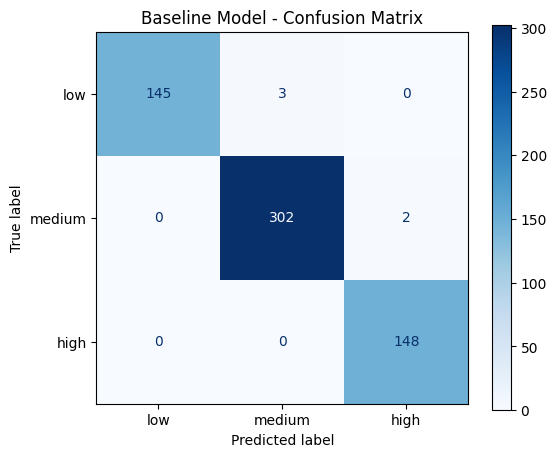

In [563]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low', 'medium', 'high'])
disp.plot(ax=ax, cmap='Blues')
plt.title('Baseline Model - Confusion Matrix')
plt.show()

In [564]:
rf_baseline.feature_importances_

array([0.01569083, 0.01074179, 0.01380051, 0.01305806, 0.01401826,
       0.01285853, 0.01303785, 0.01355373, 0.01415107, 0.01458007,
       0.01338645, 0.01190529, 0.01442604, 0.01354594, 0.00169525,
       0.00349378, 0.20269166, 0.36512009, 0.23382161, 0.00442319])

In [565]:
X_encoded = X.copy()
X_encoded.columns

Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Skill_1', 'Skill_2', 'Skill_3', 'Skill_4',
       'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8', 'Skill_9', 'Skill_10',
       'Income_Band_Code', 'Experience_Band_Code', 'Sector_Code',
       'Grouping_Tag_Code', 'Job_Title_Code', 'Education_Code'],
      dtype='object')

In [566]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_baseline.feature_importances_
})

feature_importance

,feature,importance
0,Average_Salary,0.015691
1,Years_Experience,0.010742
2,AI_Exposure_Index,0.013801
3,Tech_Growth_Factor,0.013058
4,Skill_1,0.014018
5,Skill_2,0.012859
6,Skill_3,0.013038
7,Skill_4,0.013554
8,Skill_5,0.014151
9,Skill_6,0.014580


In [567]:
feature_importance = feature_importance.sort_values('importance', ascending=False)

In [568]:
feature_importance

,feature,importance
17,Grouping_Tag_Code,0.365120
18,Job_Title_Code,0.233822
16,Sector_Code,0.202692
0,Average_Salary,0.015691
9,Skill_6,0.014580
12,Skill_9,0.014426
8,Skill_5,0.014151
4,Skill_1,0.014018
2,AI_Exposure_Index,0.013801
7,Skill_4,0.013554


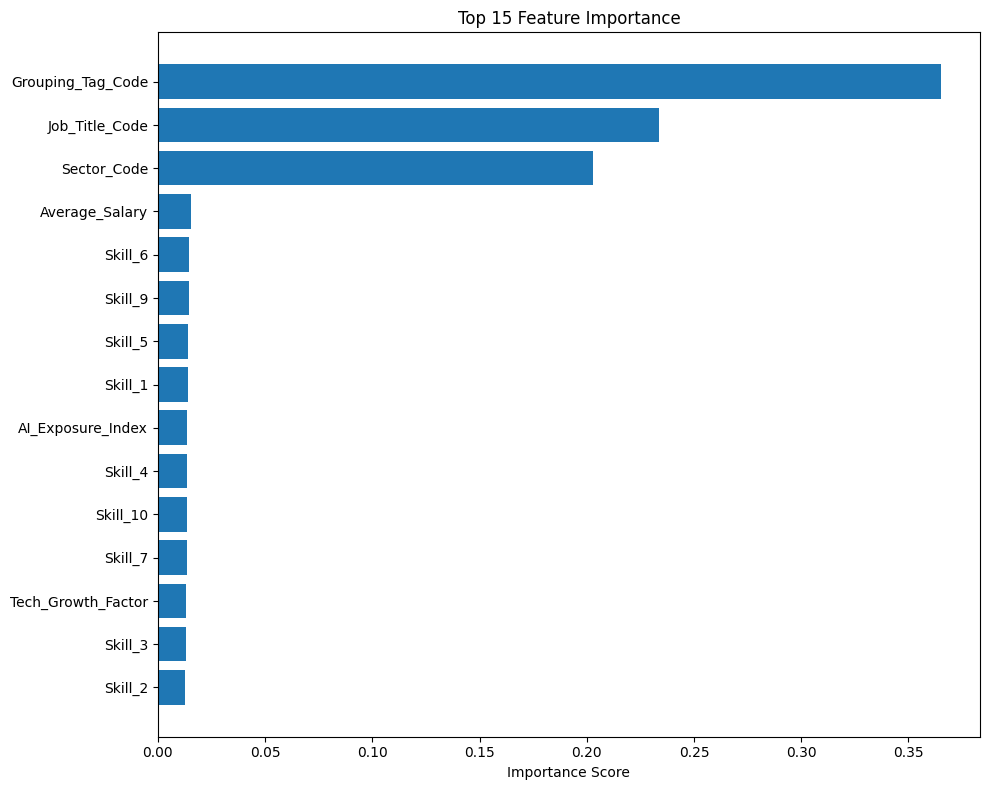

In [569]:
# Visualise feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'].values)
plt.yticks(range(len(top_features)), top_features['feature'].values)
plt.xlabel('Importance Score')
plt.title('Top 15 Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [570]:
# Select top features
top_n = 3
selected_features = feature_importance.head(top_n)['feature'].tolist()

selected_features

['Grouping_Tag_Code', 'Job_Title_Code', 'Sector_Code']

In [571]:
# Train model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

In [572]:
accuracy_selected * 100

99.33333333333333

In [573]:
(accuracy_selected - accuracy) * 100

0.1666666666666594

In [574]:
# Import GridSearchCV 
from sklearn.model_selection import GridSearchCV

# Define parameter grid (simple)
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10]
}

In [575]:
# Grid search with cross-validation
rf_grid = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_grid, param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [100, 200, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [576]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [577]:
grid_search.best_score_

np.float64(0.9929166666666667)

In [578]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_selected)
accuracy_best = accuracy_score(y_test, y_pred_best)

In [579]:
accuracy

0.9916666666666667

In [580]:
accuracy_selected

0.9933333333333333

In [581]:
accuracy_best

0.9933333333333333

In [582]:
(accuracy_best - accuracy)*100

0.1666666666666594

In [583]:
print(classification_report(y_test, y_pred_best, target_names= ['low', 'medium', 'high']))

              precision    recall  f1-score   support

         low       1.00      0.99      0.99       148
      medium       0.99      0.99      0.99       304
        high       0.99      1.00      0.99       148

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



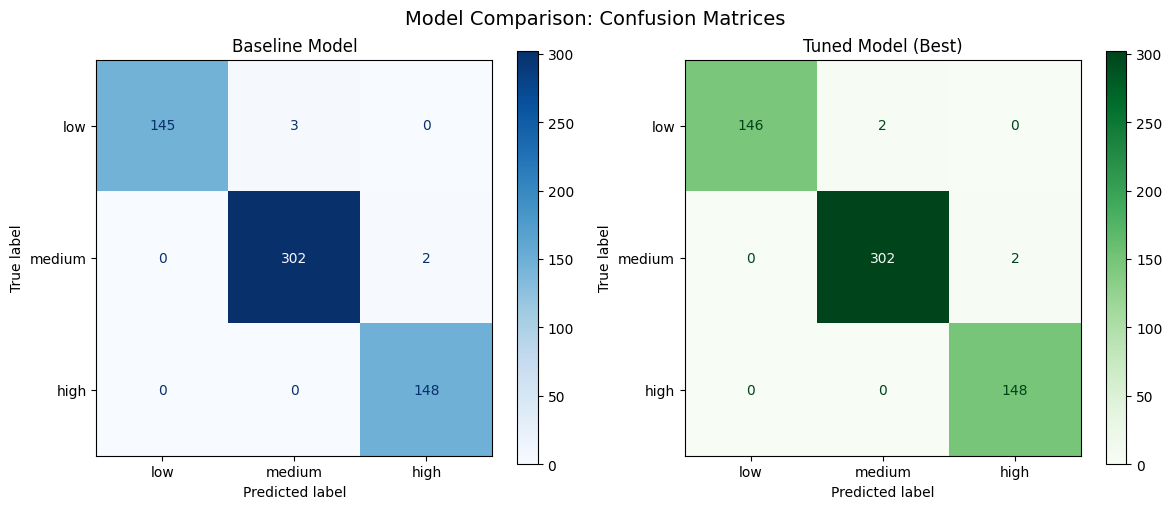

In [584]:
# Final confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Baseline
cm_baseline = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_baseline, 
                                display_labels=['low', 'medium', 'high'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Baseline Model')

# Best model
cm_best = confusion_matrix(y_test, y_pred_best)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_best, 
                                display_labels=['low', 'medium', 'high'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Tuned Model (Best)')

plt.suptitle('Model Comparison: Confusion Matrices', fontsize=14)
plt.tight_layout()
plt.show()

In [585]:
# Feature importance from best model
final_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': best_model.feature_importances_
})

final_importance = final_importance.sort_values('importance', ascending=False)
final_importance

,feature,importance
0,Grouping_Tag_Code,0.384919
1,Job_Title_Code,0.360824
2,Sector_Code,0.254257
